# Visualizing Earnings Based on College Majors

## Introduction

In this project we are going to quickly explore some data with visualizations using pandas and matplotlib's pyplot. 

The dataset we are working with contains the job outcomes of students who graduated from college between 2010 and 2012. The original data comes from the American Community Survey, and was cleaned and released by FiveThirtyEight on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a college major and contains information on gender diversity, employment rates, salaries, and more. Using visualizations, we will ask questions like: 

* Do students in more popular majors earn more money?
* How many majors are predominantly male and female?
* Which majors have the most students?

First we will import the libraries, take a quick look at the data, and remove rows in the dataset containing null values.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())
recent_grads.describe()

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [3]:
# cleaning the data and dropping rows with missing values
raw_data_count = len(recent_grads.index)
print('Number of Rows Before: ', raw_data_count)
recent_grads = recent_grads.dropna()
cleaned_data_count = len(recent_grads.index)
print('Number of Rows After: ', cleaned_data_count)

Number of Rows Before:  173
Number of Rows After:  172


We see that only one row containing null values was dropped.

## Pandas, Scatter Plots

Next we are going to use scatter plots to explore some of the relations in the data.

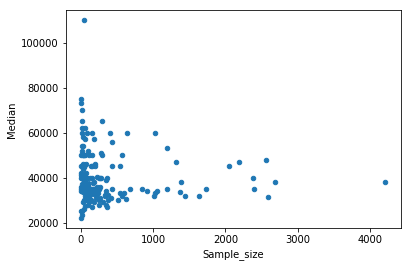

In [4]:
recent_grads.plot(x='Sample_size' , y='Median' , kind='scatter')

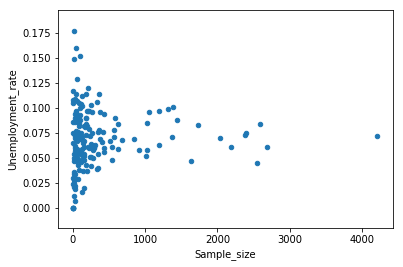

In [5]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

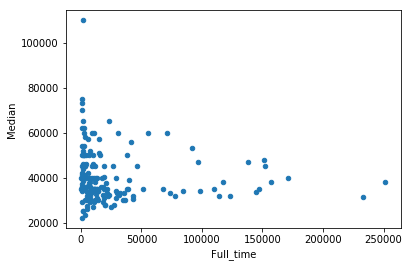

In [6]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

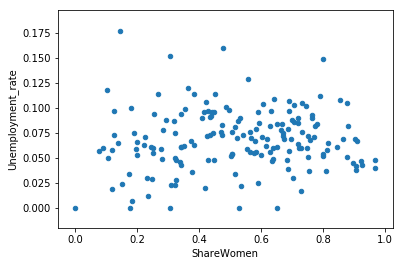

In [7]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

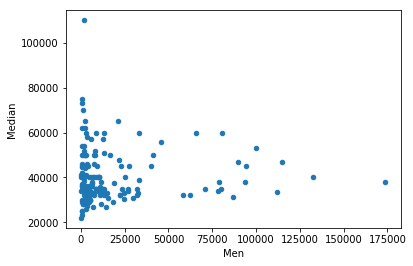

In [8]:
recent_grads.plot(x='Men', y='Median', kind='scatter')

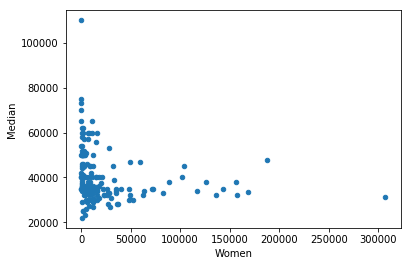

In [9]:
recent_grads.plot(x='Women', y='Median', kind='scatter')

By looking at the scatter plots we might infer that there is a weak correlation between higher incomes in the less popular college majors. It also looks like students that majored in subjects that are majority female earn more money.

## Pandas, Histograms

Next we will use histograms to explore the distributions of some of our columns. With histograms we can answer questions like: what percent of majors are predominantly male and female, and what is the most common median salary range?

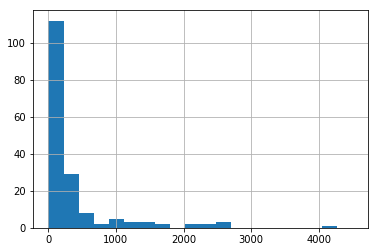

In [10]:
recent_grads['Sample_size'].hist(bins=20, range=(0,4500))

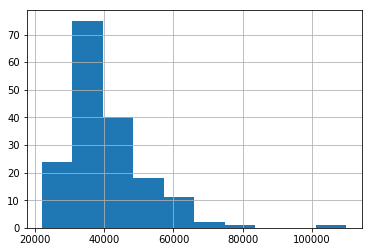

In [11]:
recent_grads['Median'].hist(bins=10)

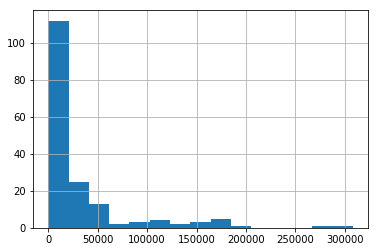

In [12]:
recent_grads['Employed'].hist(bins=15)

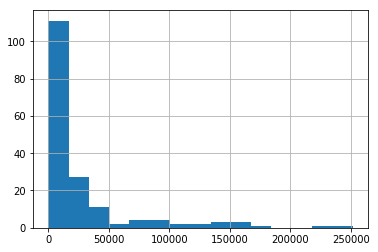

In [13]:
recent_grads['Full_time'].hist(bins=15)

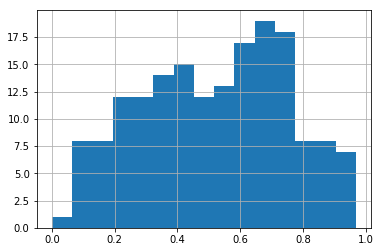

In [14]:
recent_grads['ShareWomen'].hist(bins=15)

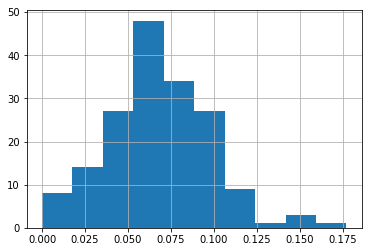

In [15]:
recent_grads['Unemployment_rate'].hist(bins=10)

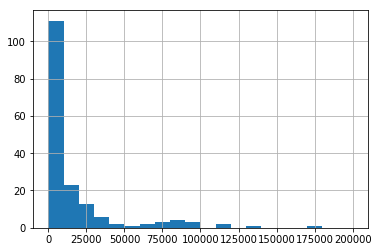

In [16]:
recent_grads['Men'].hist(bins=20, range=(0,200000))

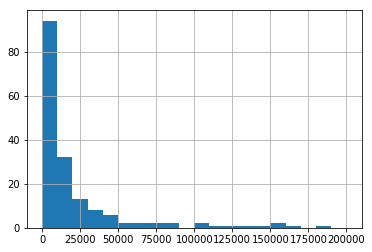

In [17]:
recent_grads['Women'].hist(bins=20, range=(0,200000))

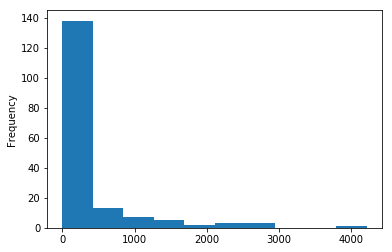

In [18]:
recent_grads['Sample_size'].plot(kind='hist')

## Pandas, Scatter Matrix Plot

Here we will use scatter matrix plots that will allow us to explore potential relationships and distributions of our data simultaneously.

In [19]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd110bc4390>,
      dtype=object)

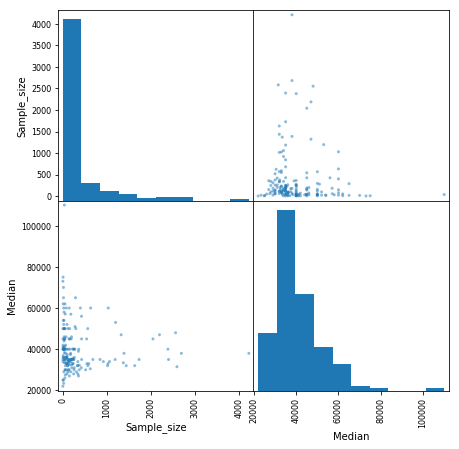

In [20]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(7,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd110bc4358>,
      dtype=object)

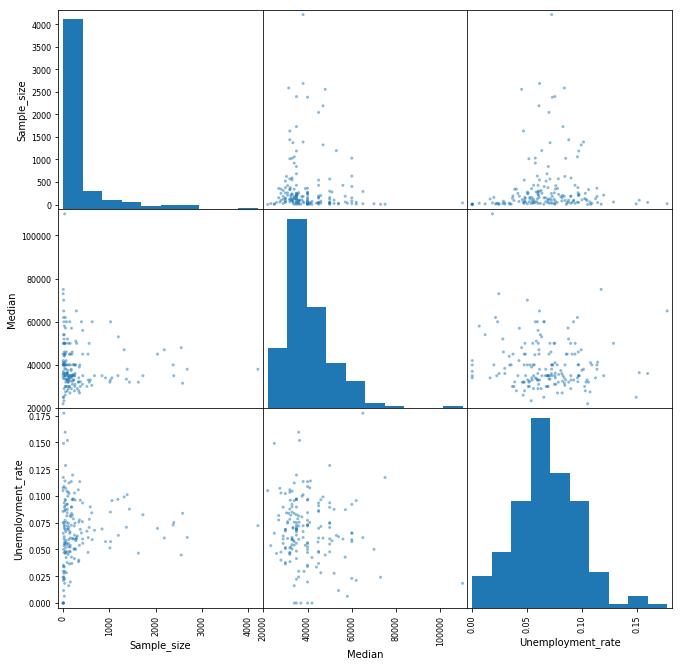

In [21]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(11,11))

## Pandas, Bar Plots

Here we will use bar plots to compare the percentages of women in the first 10 majors and the last 10 majors of the recent_grads DataFrame. We will also look at the unemployment rate of the same majors.

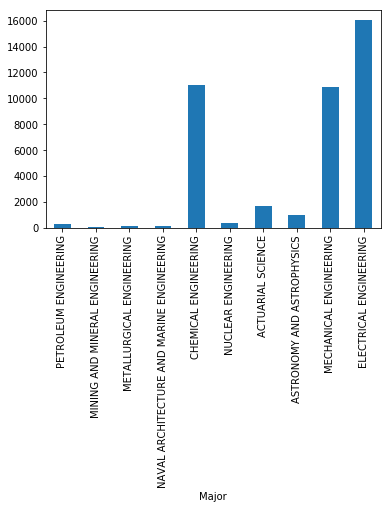

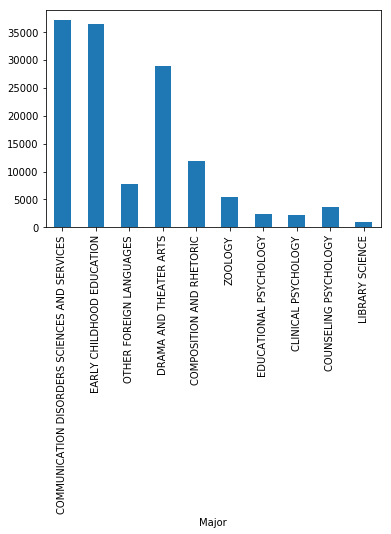

In [22]:
recent_grads[:10].plot.bar(x='Major', y='Women', legend=False)
recent_grads[-10:].plot.bar(x='Major', y='Women', legend=False)

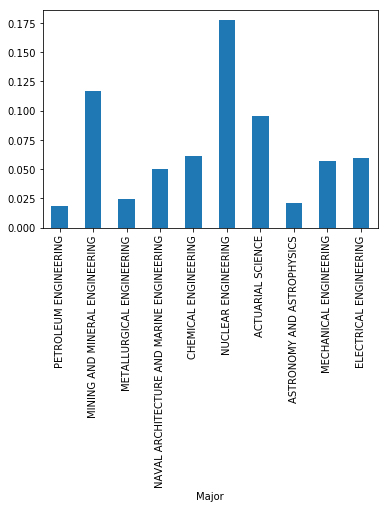

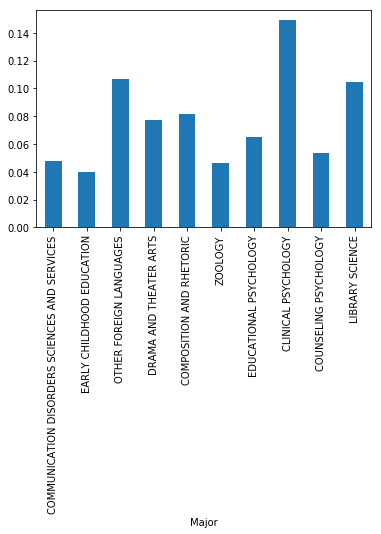

In [23]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate', legend=False)

## Conclusion

In this project we saw how plotting tools built into pandas can be used to explore data. There are many more plots built into pandas that we could use for further analysis such as: **grouped bar plots** to compare the number of men and women in each major, **box plots** to explore distributions of median salaries and unemployment rates, **hexagonal bin plots** to visualize the columns that had scatter plots that were too dense to visualize well.

The idea for this project comes from the [Dataquest](https://app.dataquest.io/) **Exploratory Data Visualization** course.